<h1 align="center">CMSC320 Final Project</h1> 

<h2 align="center">An Analysis of Heart Diseases and Attributes Leading to Heart Disease</h2>

<h3 align="center">By: Jordan Waite</h3>

#### Introduction
##### Heart Disease is an issue plaguing society today until recently with Heart Disease was the number one cause of death every year in the United States. COVID-19 has taken its place this year but it is also common knowledge now the obesity and other conditions that play a role in heart disease are common risk factors for more serious cases of COVID. 
##### The CDC defines heart disease as a term "“heart disease” refers to several types of heart conditions. The most common type of heart disease in the United States is coronary artery disease (CAD), which affects the blood flow to the heart. Decreased blood flow can cause a heart attack." They also list some shocking facts about heart disease. One pers dies every 36 seconds in the US from Heart Disease. Heart Disease cost the US about 219 billion dollars every year. Around 655,000 people die of Heart Disease or its related complications every year. This is about 1 in every 4 deaths. Armed with just a few of these facts we can see the heart disease is a very serious problem in the United States and it is something that we as people can take into our own hands in many cases to prevent it.
##### The goal of this project is to look at determining factors of heart disease and other attributes and make determination on people who would be at higher risk and which attributes you may want to control to reduce your risk. This dataset contains 13 attributes and then the target column. This column indicates the presence of heart disease or not (0= heart disease, 1 no disease present). 

## Imports


In [201]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from matplotlib import pyplot
from PIL import Image
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

### Data Collection
##### For this project I am reading a CSV file using Pandas read_csv function. For our predictions we need data on risk factors leading to or correlating with heart disease. I found my data set on kaggle. The link to the specific data set is at https://www.kaggle.com/ronitf/heart-disease-uci . This dataset was created by 4 medical doctors using data from the Cleveland Database. The original database had a scale for the presence of heart disease. This table has been changed to the presence of heart disease and no presence of heart disease. In other words they have it or they do not.
##### 1. age 
##### 2. sex 
##### 3. chest pain type (4 values, 0-3 progressivley increasing) 
##### 4. resting blood pressure (systolic number)
##### 5.serum cholestoral in mg/dl 
##### 6.fasting blood sugar > 120 mg/dl (1=true,0=false)
##### 7.resting electrocardiographic results (values 0,1,2)
##### 8.maximum heart rate achieved 
##### 9.exercise induced angina 
##### 10.oldpeak = ST depression induced by exercise relative to rest 
##### 11.the slope of the peak exercise ST segment 
##### 12.number of major vessels (0-3) colored by flourosopy 
##### 13.thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
##### 14.Target 0=Heart Disease 1=No Heart Disease

In [202]:
Attributes = pd.read_csv("heart.csv")
Attributes

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Cleaning Data
##### The data is already in a format so not much is needed. All values are already numeric which will help us later when running random forests.One thing that I will be doing renaming some of the columns so they are more easily identifiable. This will also help later when graphing certain conditions. I will also being id's for each patient. The names of the patients were removed from the original databases for privacy, id's will allow me to refer to individuals.

In [203]:
Attributes = Attributes.rename(columns={"cp": "Chest_Pain", "trestbps": "rest_blood_pres", "fbs" : "fast_blood_pres",
                          "thalach" : "max_HR", "exang" : "exercise_angina", "ca" : "vessel_flouro"})
Attributes["id"] = 1
counter = 1
for i, row in Attributes.iterrows():
    Attributes["id"][i] = counter
    counter = counter + 1
col_name = "id"
first_col = Attributes.pop(col_name)
Attributes.insert(0, col_name, first_col)
Attributes

,id,age,sex,Chest_Pain,rest_blood_pres,chol,fast_blood_pres,restecg,max_HR,exercise_angina,oldpeak,slope,vessel_flouro,thal,target
0,1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,300,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,301,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,302,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Graphs
##### A great way to visualize data is graphs i will correlate some of the data to see how each factor individually effect heart disease.

,id,age,sex,Chest_Pain,rest_blood_pres,chol,fast_blood_pres,restecg,max_HR,exercise_angina,oldpeak,slope,vessel_flouro,thal,target
0,1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
13,14,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
17,18,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
19,20,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
23,24,61,1,2,150,243,1,1,137,1,1.0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,291,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
293,294,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
295,296,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,297,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0


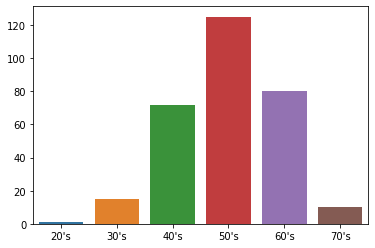

In [204]:
in20 = Attributes[Attributes["age"] < 30] 

in30 = Attributes[Attributes["age"] > 29] 
in30 = in30[in30["age"] < 40]

in40 = Attributes[Attributes["age"] > 39] 
in40 =in40[in40["age"] < 50]

in50 = Attributes[Attributes["age"] > 49] 
in50 =in50[in50["age"] < 60]

in60 = Attributes[Attributes["age"] > 59] 
in60 =in60[in60["age"] < 70]

in70 = Attributes[Attributes["age"] > 69] 
in70 =in70[in70["age"] < 80]


each_age = [len(in20.index), len(in30.index), len(in40.index),len(in50.index), 
            len(in60.index), len(in70.index)]
age_range = ["20's", "30's","40's","50's", "60's", "70's"]

sns.barplot(y=each_age, x=age_range)
in60


##### I have split into multiple data frames age ranges so I can further examine the data. This will allow me to correlate data to age ranges. The ages examined surround people in their 50's. Subjects in the 20's and 70's seem to be the outliers while the main subjects are those in there 40's,50's and 60's

Text(0.5, 1.0, 'Age Correlation W/ Heart Disease ')

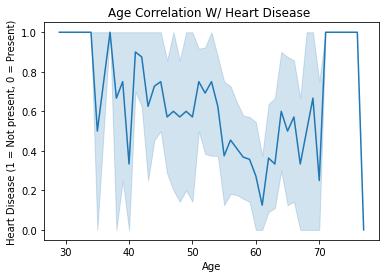

In [205]:
sns.lineplot(x='age', y='target', data=Attributes)
pyplot.ylabel('Heart Disease (1 = Not present, 0 = Present)')
pyplot.xlabel('Age')
pyplot.title("Age Correlation W/ Heart Disease ")

##### I used this graph to show if there was any particular age range more susceptible to heart disease based on the data that was taken there seems to be no correlation between age and heart disease. There are many people with it that are young and old, but there are also many people that don't have it in all age ranges.Bbut there is an increasing trend of heart disease with age.

Text(0.5, 1.0, 'Chest pain Correlation W/ Heart Disease ')

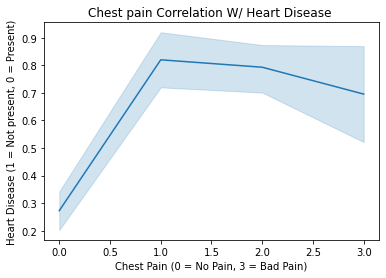

In [206]:
sns.lineplot(x='Chest_Pain', y='target', data=Attributes)
pyplot.ylabel('Heart Disease (1 = Not present, 0 = Present)')
pyplot.xlabel('Chest Pain (0 = No Pain, 3 = Bad Pain)')
pyplot.title("Chest pain Correlation W/ Heart Disease ")

##### This graph shows that as chest pain increases so does the likelihood of Heart disease. This is most likely not a cause but a biproduct of it. This shows that people who have chest pain should be getting checked out for heart disease to get on top of it before it gets bad.

Text(0.5, 1.0, 'Resting Blood Pressure Correlation W/ Heart Disease ')

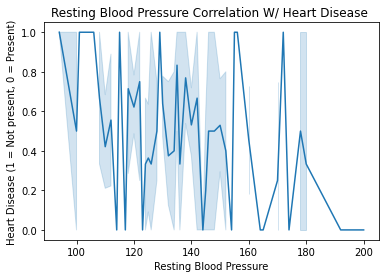

In [207]:
sns.lineplot(x='rest_blood_pres', y='target', data=Attributes)
pyplot.ylabel('Heart Disease (1 = Not present, 0 = Present)')
pyplot.xlabel('Resting Blood Pressure')
pyplot.title("Resting Blood Pressure Correlation W/ Heart Disease ")

##### There looks to be little to no correlation between Heart disease and blood pressure from this dataset but we do know from other studies hypertension is a common issue leading to heart disease.

Text(0.5, 1.0, 'Max Heart Rate Correlation W/ Heart Disease ')

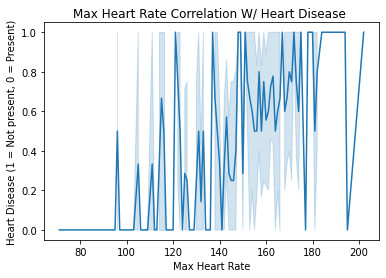

In [208]:
sns.lineplot(x='max_HR', y='target', data=Attributes)
pyplot.ylabel('Heart Disease (1 = Not present, 0 = Present)')
pyplot.xlabel('Max Heart Rate')
pyplot.title("Max Heart Rate Correlation W/ Heart Disease ")

##### This line plot shows an upward trend that people with a higher max heart rate have a lower likelihood of developing heart disease. This could possibly be because they are healthier individuals.

Text(0.5, 1.0, 'Cholesterol Level Correlation W/ Heart Disease ')

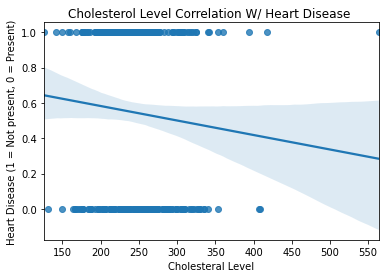

In [209]:
sns.regplot(x='chol', y='target', data=Attributes)
pyplot.ylabel('Heart Disease (1 = Not present, 0 = Present)')
pyplot.xlabel('Cholesteral Level')
pyplot.title("Cholesterol Level Correlation W/ Heart Disease ")

##### We see here from the regression line that as peoples cholesterol levels get higher people tend to have a higher risk of having heart disease. Lowering cholesterol is a commonly known way to reduce risk of heart complications.

In [210]:
age = 0
counter = 0
for i, row in Attributes.iterrows():
    if (Attributes["target"][i] == 0):
        age += Attributes["age"][i]
        counter += 1
        
print("The average age of people with heart disease in this dataset is " + str(age/counter))

The average age of people with heart disease in this dataset is 56.60144927536232


##### There could be multiple interpretations of this data. I see that people who die of heart disease generally die younger so this puts the average age around 56.6. To calculate this I added up all of the ages of all people with heart disease in the dataset and added up the number of people with heart disease total in the dataset. I then divided the sum of ages by the number of people with heart disease.

### Relationships Between Attributes

##### I wil be looking at relationships between not only Attributes and heart disease but attributes and other attributes. Many diseases and disorders are progressive. This will allow me to see if one attribute can cause another.

Text(0.5, 1.0, 'Cholesteral Levels vs. Resting Blood Pressure')

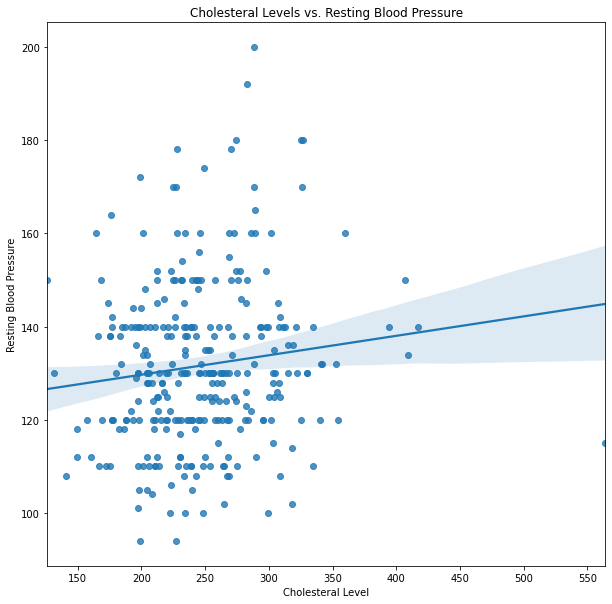

In [211]:
figure(figsize=(10,10))
sns.regplot(x='chol', y='rest_blood_pres', data=Attributes)
pyplot.xlabel('Cholesteral Level')
pyplot.ylabel('Resting Blood Pressure')
pyplot.title("Cholesteral Levels vs. Resting Blood Pressure")

##### While the regression line does not fit the data perfectly it does show that there is a positive correlation between resting blood pressure and cholesterol level. As someones cholesterol level increases their resting blood pressure should increase. Both of these have a positive correlation with Heart disease as well. Seeing this correlation could mean reducing your cholesterol would allow you to have a lower blood pressure. This would help reduce 2 attributes that cause heart disease.

Text(0.5, 1.0, 'ST Depression Induced by Exercise vs. Resting Blood Pressure')

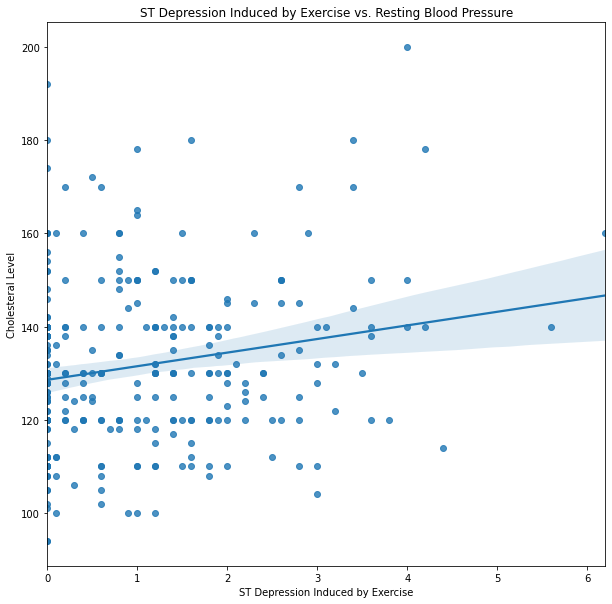

In [212]:
figure(figsize=(10,10))
sns.regplot(x='oldpeak', y='rest_blood_pres', data=Attributes)
pyplot.ylabel('Cholesteral Level')
pyplot.xlabel('ST Depression Induced by Exercise')
pyplot.title("ST Depression Induced by Exercise vs. Resting Blood Pressure")

##### ST waves or the last 2 points that a person sees in a Wave for a heart beat. PQRST is the whole wave. P is the upper peak before the first depression. Q is the first valley. Ris the highest peak in the wave. S is the next valley an T is the final point in the whole Wave. We are looking at the S depression or valley before the final T peak. The increase in the depresion on the EKG is correlated with a rise in resting blood pressure. This means reducing blood pressure could reduce this depression. This would help with decreasing the risk of heart disease. More information on the PQRST wave is pictured below

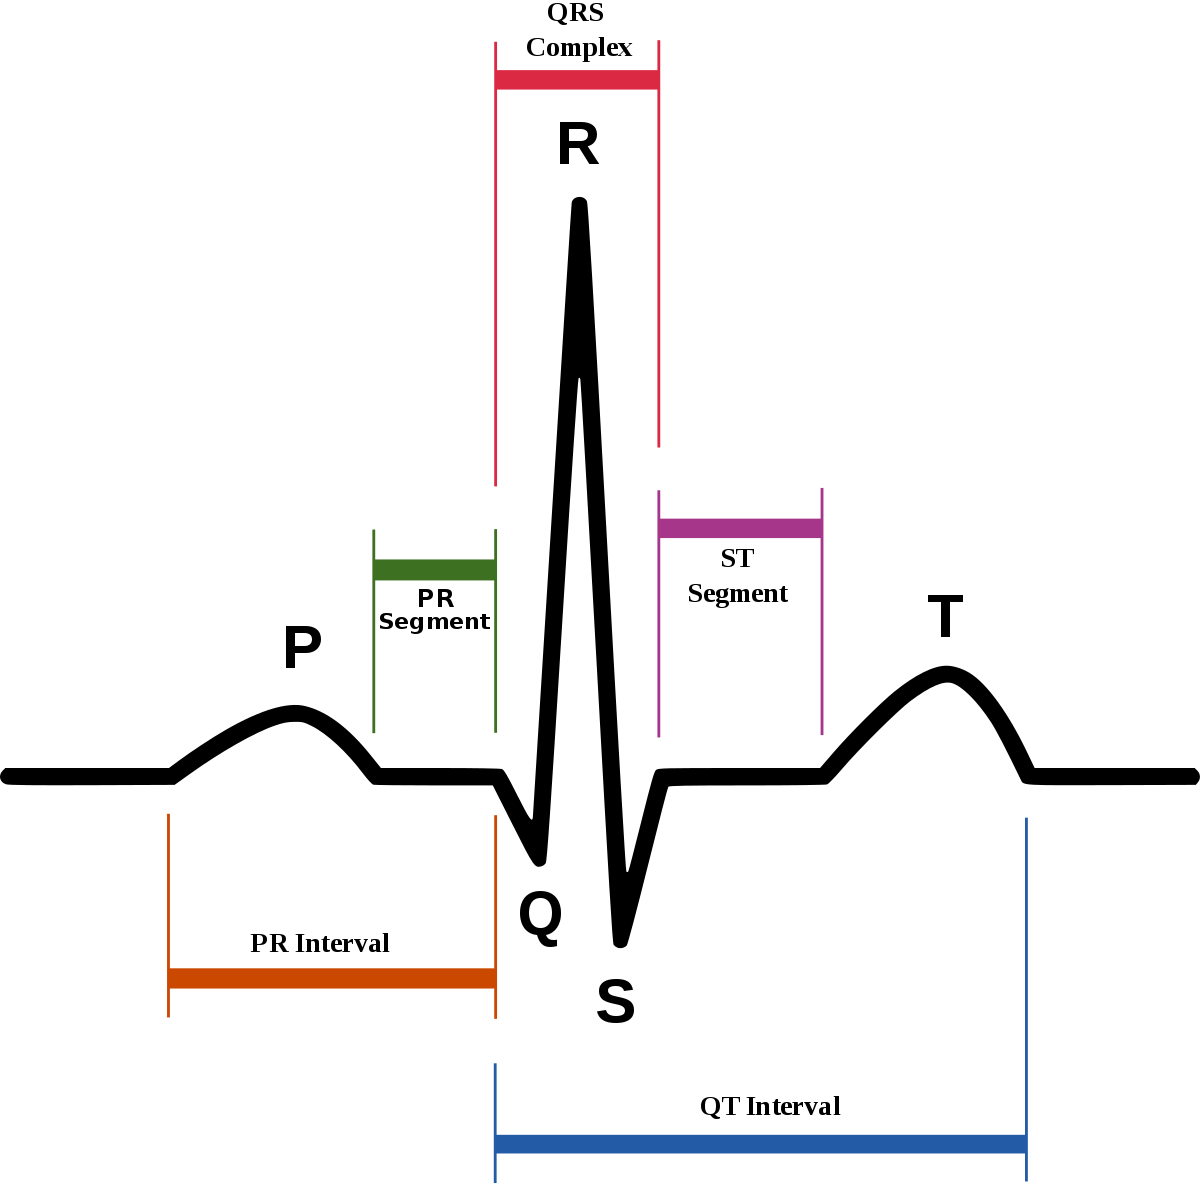

In [213]:
try:  
    img  = Image.open("1200px-SinusRhythmLabels.svg.png")  
except IOError: 
    pass
img

## Machine Learning Algorithms

##### Normally these algorithms would require me to set up the data to be correctly interpreted by the functions. The data we were given though is completely numerical making it easier becuase i do not need to clean the data to fit them at all. I chose K-NN classification and random forests for this part.

### K-NN Classification

In [214]:
knn = KNeighborsClassifier()

#Labels and Attributes
X = Attributes.drop('target',axis=1).values
y = Attributes['target'].values

#Split into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y) 

In [215]:
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [216]:
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit model
    knn.fit(X_train, y_train)
    
    #Find training set accuraccy
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Find testing set accuraccy
    test_accuracy[i] = knn.score(X_test, y_test) 

Text(0, 0.5, 'Accuracy')

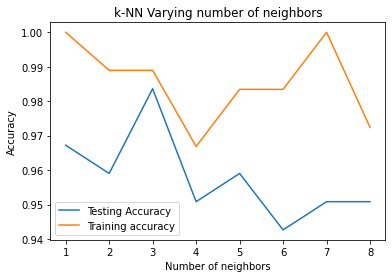

In [217]:
#creat plot to find optimal k
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')


##### The based on the 2 lines since they are closest at 3 neighbors this should be the most accurate measurements so we will find answers K-NN Classification with 3 neighbors

In [218]:
knn = KNeighborsClassifier(n_neighbors=3)
best_fit = knn.fit(X_train,y_train)
ten_fold = cross_val_score(best_fit, X,y,cv=10)

In [219]:
print("Optimal k parameter is 3")
print("Avg 10 fold CV Score is " + str(ten_fold.mean()))
print("STD Error is " + str(ten_fold.std()/ np.sqrt(10)))

Optimal k parameter is 3
Avg 10 fold CV Score is 0.9475268817204301
STD Error is 0.033192487730841345


##### Running the K-NN algorithm with 3 neighbors gives us a very high 10 fold cross validation of 94.8%. I also gives us an acceptable standard error 3% which is less than our acceptable margin of 5%. This means that given the data that we have using a K-NN algorithm to predict someone's risk of having heart disease is acceptable.

### Random Forests 

In [220]:
estimators  = np.arange(1,9)
train_accuracy =np.empty(len(estimators))
test_accuracy = np.empty(len(estimators))

for i,k in enumerate(estimators):
    #Setup a f classifier k estimators
    rf = RandomForestClassifier(n_estimators=k)
    
    #Fit model
    rf.fit(X_train, y_train)
    
    #Compute accuracy of raining set
    train_accuracy[i] = rf.score(X_train, y_train)
    
    #Compute accuracy of test set
    test_accuracy[i] = rf.score(X_test, y_test) 

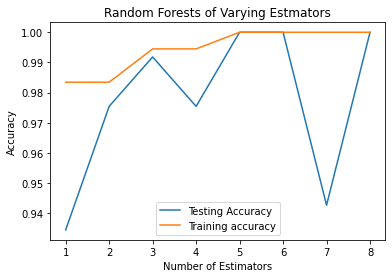

In [221]:
#Create plot to find optimal k value
plt.title('Random Forests of Varying Estmators')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.show()

##### The testing accuracy and training accuracy actually converge on this random forest plot at 7 estimators. So we will use 7 estiators for our random forests test. 

In [222]:
rf = RandomForestClassifier(n_estimators=7)

best_fit = rf.fit(X_train,y_train)

ten_fold = cross_val_score(best_fit, X,y,cv=10)

print("Optimal k parameter is 7")
print("Avg 10 fold CV Score is " + str(ten_fold.mean()))
print("STD Error is " + str(ten_fold.std()/ np.sqrt(10)))

Optimal k parameter is 7
Avg 10 fold CV Score is 0.9637634408602151
STD Error is 0.0240754825253329


##### Using the optimal k parameter of 7 I ran random forests on the data. This gave me 96% accuracy 10 fold cross validation score. So this is a very accurate predictor. The standard of error is way within our means of 5%. It comes in at 2.1%. This means that random forests is a acceptable algorithm to determine someones risk of having heart disease.

### Conclusion
##### Heart Disease is a very prominent issue in the United States and is preventable as well. Throughout this we went through a data analysis step by step. We first discovered data from a kaggle site and imported that as a CSV file. This gave us a relatively clean data set. We only needed to change some column names for better interpretation. If given data in a different form we would have had to clean it and make it possible to perform exploratory data analysis on it. We then used some machine learning principle and algorithms including K-NN Classifier (not regressor) and Random Forests to find the best performing algorithm to predict heart disease based off of the attributes given to us in the data. Kaggles format made this very easy because the data was in all numerical form which made the data easy to run the algorithms on because i did not have to change anything due to ML's numerical requirements. 

### Extra Resources
##### In order to learn more about heart disease before I did this project I looked at some reputable resources. I also viewed other data sets to see if trends were in agreement. This allowed me to have extra insights going into my analysis of the data. I also viewed some extra readings on machine learning algorithms to help me with my analysis and the K-NN Classifier as well as random forests.
##### Here are a few of them:
##### 1. https://www.cdc.gov/heartdisease/facts.htm
##### 2. https://towardsdatascience.com/heart-disease-prediction-73468d630cfc
##### 3. https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive
##### 4. https://www.webmd.com/heart-disease/default.htm
##### 5. https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
##### 6. https://builtin.com/data-science/random-forest-algorithm
##### 7. https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652